# predicting price

In [43]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import math

In [8]:
rides = pd.read_csv('data/cab_rides.csv')
rideshare = pd.read_csv('data/rideshare_kaggle.csv')
weather = pd.read_csv('data/weather.csv')

In [9]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [10]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


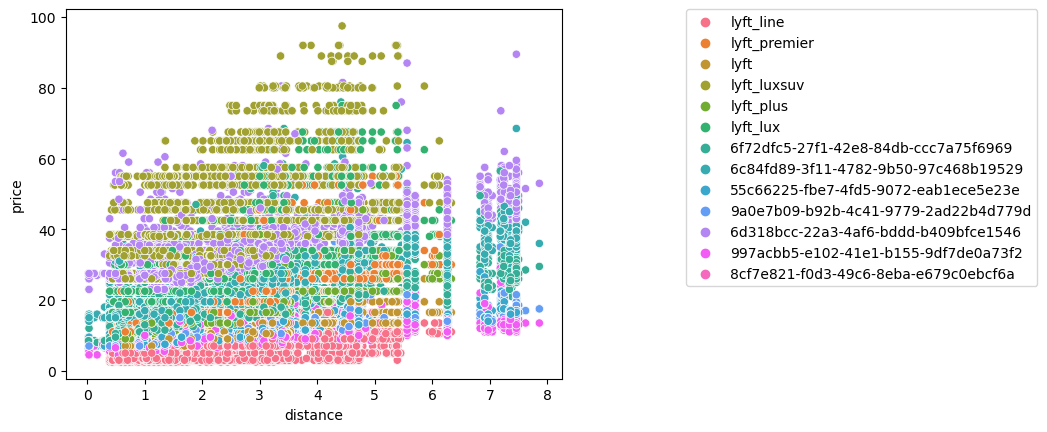

In [47]:
sns.scatterplot(data = rides, x = 'distance', y = 'price', hue = 'product_id')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

In [23]:
model = smf.ols(formula = 'price~distance+product_id+destination', data = rides).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.336e+05
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:18:27   Log-Likelihood:            -1.6141e+06
No. Observations:              637976   AIC:                         3.228e+06
Df Residuals:                  637952   BIC:                         3.229e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              3.4853      0.020    177.145      0.000       3.447       3.524
product_id[T.6c84fd89-3f11-4782-9b50-97c468b19529]    10.7587      0.018    587.820      0.000      10.723      10.795
product_id[T.6d318bcc-22a3-4af6-bddd-b409bfce1546]    20.5217      0.018   1121.245      0.000      20.486      20.558
product_id[T.6f72dfc5-27f1-42e8-84db-ccc7a75f6969]     5.9131      0.018    323.075      0.000       5.877       5.949
product_id[T.8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a]  2.567e-15   7.37e-18    348.530      0.000    2.55e-15    2.58e-15
product_id[T.997acbb5-e102-41e1-b155-9df7de0a73f2]    -1.0126      0.018    -55.324      0.000      -1.048      -0.977
product_id[T.9a0e7b09-b92b-4c41-9779-2ad22b4d779d]   -1.3e-05      0.018     -0.001      0.999      -0.036       0.036
product_id[T.lyft]                                    -0.1418      0.019     -7.604      0.000      -0.178      -0.105
product_id[T.lyft_line]                               -3.7229      0.019   -199.678      0.000      -3.759      -3.686
product_id[T.lyft_lux]                                13.3098      0.019    713.883      0.000      13.273      13.346
product_id[T.lyft_luxsuv]                             22.5714      0.019   1210.637      0.000      22.535      22.608
product_id[T.lyft_plus]                                5.5567      0.019    298.039      0.000       5.520       5.593
product_id[T.lyft_premier]                             8.0186      0.019    430.084      0.000       7.982       8.055
destination[T.Beacon Hill]                            -0.3300      0.019    -17.682      0.000      -0.367      -0.293
destination[T.Boston University]                       0.0596      0.019      3.146      0.002       0.022       0.097
destination[T.Fenway]                                 -0.2886      0.019    -15.307      0.000      -0.326      -0.252
destination[T.Financial District]                      0.4098      0.019     21.990      0.000       0.373       0.446
destination[T.Haymarket Square]                        0.1931      0.019     10.248      0.000       0.156       0.230
destination[T.North End]                               0.0659      0.019      3.524      0.000       0.029       0.103
destination[T.North Station]                           0.1931      0.019     10.330      0.000       0.156       0.230
destination[T.Northeastern University]                 0.0351      0.019      1.875      0.061      -0.002       0.072
destination[T.South Station]                          -0.0353      0.019     -1.885      0.059      -0.072       0.001
destination[T.Theatre District]                        0.2230      0.019     11.968      0.000       0.187  

# categorizing whether it's a higher price than normal or not

In [ ]:
# get mean of the price for each combo of distance bin, and lyft/uber
# if the price is higher than that, it's "higher price than expected" -- make new col 1 = higher than expected
# predict that value

In [69]:
binned_expend = pd.qcut(rides['distance'],3,retbins = True, labels=['low', 'med', 'high'])
rides['bins'] = pd.qcut(rides['distance'],3, labels=['low', 'med', 'high'])
rides.sort_values('distance')

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,surge,bins
227442,0.02,Uber,1543282042097,Theatre District,South Station,NaN,1.0,3c5427c2-3a0b-473d-bfd3-93f73c0d69f8,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,0,low
11277,0.02,Uber,1543887777270,Theatre District,South Station,7.5,1.0,8f988356-8412-4e83-b80d-af5d35a98d52,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,0,low
514756,0.02,Uber,1543568577390,South Station,Theatre District,6.5,1.0,9897d96c-4862-4229-8856-c9d25d553c61,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,0,low
514755,0.02,Uber,1543568577390,South Station,Theatre District,15.0,1.0,4f5066b7-8c85-4a22-a988-9f3fb462db27,6c84fd89-3f11-4782-9b50-97c468b19529,Black,0,low
514754,0.02,Uber,1543568577390,South Station,Theatre District,27.5,1.0,3e36822f-c5f0-43fa-a089-150a44fdb31a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
658723,7.86,Uber,1545063010990,Financial District,Northeastern University,17.5,1.0,03832272-f604-4c54-845a-b55387703959,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,0,high
658728,7.86,Uber,1544850306199,Financial District,Northeastern University,53.0,1.0,f40aa84e-fe70-4ef7-9860-9315fb8cd63f,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,0,high
658729,7.86,Uber,1544850306199,Financial District,Northeastern University,29.5,1.0,f70c929c-9476-42ec-8776-b9ff48e575cc,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,0,high
658726,7.86,Uber,1544850306199,Financial District,Northeastern University,13.5,1.0,5bab99ba-9e97-423b-8129-41999254ae05,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,0,high


In [71]:
new = rides.groupby(['cab_type','bins']).mean()
new

distance    time_stamp      price  surge_multiplier     surge
cab_type bins                                                               
Lyft     low   1.036256  1.544043e+12  13.469633          1.023319  0.052875
         med   2.087350  1.544044e+12  16.997910          1.033944  0.074436
         high  3.405434  1.544048e+12  21.478121          1.036512  0.077373
Uber     low   1.005566  1.544042e+12  12.970627          1.000000  0.000000
         med   2.111826  1.544049e+12  15.430103          1.000000  0.000000
         high  3.487421  1.544048e+12  19.066694          1.000000  0.000000

next step: if the price is higher than the mean price for that bin, it's "higher price than expected" -- make new col 1 = higher than expected

then: make logistic model predicting whether it's higher price than expected

# previous 

In [24]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [41]:
rides['surge'] = pd.Series(rides.loc[:,'surge_multiplier']).apply(lambda x: 0 if x==1 else 1)

In [40]:
rides['surge'].value_counts()

0    672096
1     20975
Name: surge, dtype: int64

In [44]:
logit_model = sm.logit(formula = 'surge~distance+product_id+destination', data = rides).fit()
logit_model.summary()

         Current function value: 0.104375
         Iterations: 35


/Users/cindywu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  surge   No. Observations:               693071
Model:                          Logit   Df Residuals:                   693046
Method:                           MLE   Df Model:                           24
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.2306
Time:                        14:23:22   Log-Likelihood:                -72339.
converged:                      False   LL-Null:                       -94021.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            -17.6897     24.123     -0.733      0.463     -64.970      29.590
product_id[T.6c84fd89-3f11-4782-9b50-97c468b19529]     8.6269     24.125      0.358      0.721     -38.657      55.911
product_id[T.6d318bcc-22a3-4af6-bddd-b409bfce1546]     8.9899     24.124      0.373      0.709     -38.293      56.273
product_id[T.6f72dfc5-27f1-42e8-84db-ccc7a75f6969]     8.9899     24.124      0.373      0.709     -38.293      56.273
product_id[T.8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a]     8.6291     24.125      0.358      0.721     -38.655      55.913
product_id[T.997acbb5-e102-41e1-b155-9df7de0a73f2]     7.2838     24.131      0.302      0.763     -40.012      54.580
product_id[T.9a0e7b09-b92b-4c41-9779-2ad22b4d779d]     8.9899     24.124      0.373      0.709     -38.293      56.273
product_id[T.lyft]                                    14.8757     24.123      0.617      0.537     -32.404      62.156
product_id[T.lyft_line]                               -3.3858    138.560     -0.024      0.981    -274.958     268.186
product_id[T.lyft_lux]                                14.8757     24.123      0.617      0.537     -32.404      62.156
product_id[T.lyft_luxsuv]                             14.8757     24.123      0.617      0.537     -32.404      62.156
product_id[T.lyft_plus]                               14.8757     24.123      0.617      0.537     -32.404      62.156
product_id[T.lyft_premier]                            14.8757     24.123      0.617      0.537     -32.404      62.156
destination[T.Beacon Hill]                            -0.0731      0.036     -2.038      0.042      -0.143      -0.003
destination[T.Boston University]                      -0.1261      0.036     -3.492      0.000      -0.197      -0.055
destination[T.Fenway]                                 -0.1352      0.036     -3.764      0.000      -0.206      -0.065
destination[T.Financial District]                     -0.1138      0.036     -3.182      0.001      -0.184      -0.044
destination[T.Haymarket Square]                        0.1312      0.036      3.654      0.000       0.061       0.202
destination[T.North End]                               0.1616      0.035      4.614      0.000       0.093       0.230
destination[T.North Station]                          -0.0742      0.036     -2.072      0.038      -0.144      -0.004
destination[T.Northeastern University]                -0.0943      0.036     -2.647      0.008      -0.164      -0.024
destination[T.South Station]                           0.1044      0.036      2.913      0.004       0.034       0.175
destination[T.Theatre District]                        0.0663      0.035      1.890      0.059      -0.002       0.135
destination[T.West End]                               -0.0714      0.036     -1.990      0.047      -0.142      -0.001
distance                    

In [45]:
def confusion_matrix_train(model, cutoff = 0.5):
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0', 1: 'Actual 1'})
    cm = np.array(cm_df)
    accuracy = (cm[0, 0] + cm[1, 1])/cm.sum()
    return accuracy

In [46]:
confusion_matrix_train(logit_model)

0.9697361453588449